##### https://www.hackdeploy.com/learn-what-is-statistical-power-with-python/

In [37]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [38]:
# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [39]:
import random
random.seed(20) #for results to be recreated
N = 10 #number of samples to take from each population
sample1 = [random.gauss(70,20) for x in range(N)] #take N samples from population A
sample2 = [random.gauss(40,20) for x in range(N)] #take N samples from population B

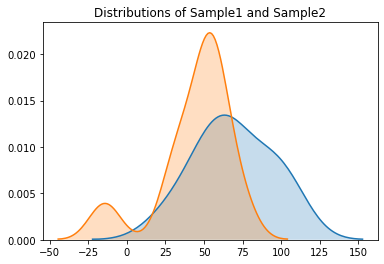

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(sample1, shade=True)
sns.kdeplot(sample2, shade=True)
plt.title("Distributions of Sample1 and Sample2")
plt.show()

##### we run an Independent Sample T-Test at 95% confidence. If the P-Value is less than 0.05 we reject the Null hypothesis that both samples have the same mean.

In [41]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(sample1, sample2, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic
###P-Value:0.03676197560784152 T-Statistic:2.2558497877562798

P-Value:0.036761975607841495 T-Statistic:2.25584978775628


### In the below code snippet, the function returns the sample size required to achieve a power of 80%

In [42]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(sample1,sample2)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)
###Sample Size: 16.442

Effect size is 1.0088466944903032
Sample Size: 16.442
